In [1]:
import torch
import torch
torch.cuda.empty_cache()
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import math


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

batch_size = 6

img_t = transform.Compose([
    transform.ToTensor()
])


train_set = torchvision.datasets.ImageFolder('/home/jaoks/Desktop/proyecto6IA/dataset/train', transform=img_t)
val_set = torchvision.datasets.ImageFolder('/home/jaoks/Desktop/proyecto6IA/dataset/val', transform=img_t)

print(train_set)
#print(len(val_set))

cuda:0
Dataset ImageFolder
    Number of datapoints: 1370
    Root location: /home/jaoks/Desktop/proyecto6IA/dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [2]:
hd_resol_train = torch.utils.data.Subset(train_set, range(685))
low_resol_train = torch.utils.data.Subset(train_set, range(685, 1370))

hd_resol_val = torch.utils.data.Subset(val_set, range(0, 119))
low_resol_val = torch.utils.data.Subset(val_set, range(170, 289))

hd_resol_test = torch.utils.data.Subset(val_set, range(119, 170))
low_resol_test = torch.utils.data.Subset(val_set, range(289, 340))

In [3]:
train_loader_low = torch.utils.data.DataLoader(dataset=low_resol_train, batch_size=batch_size, shuffle=True)
train_loader_hd = torch.utils.data.DataLoader(dataset=hd_resol_train, batch_size=batch_size, shuffle=True) 

val_loader_low =  torch.utils.data.DataLoader(dataset=low_resol_val, batch_size=batch_size, shuffle=True)
val_loader_hd =  torch.utils.data.DataLoader(dataset=hd_resol_val, batch_size=batch_size, shuffle=True)

test_loader_low =  torch.utils.data.DataLoader(dataset=low_resol_test, batch_size=17, shuffle=True)
test_loader_hd =  torch.utils.data.DataLoader(dataset=hd_resol_test, batch_size=17, shuffle=True)

In [352]:
conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, stride=1, padding=0)
pool1 = nn.MaxPool2d(2, stride = 2, return_indices=True)
conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding=0)
pool2 = nn.MaxPool2d(2, stride = 2, return_indices=True)
conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0)
pool3 = nn.MaxPool2d(2, stride = 2, return_indices=True)
conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
pool4 = nn.MaxPool2d(2, stride = 2, return_indices=True)
conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
pool5 = nn.MaxPool2d(2, stride = 2, return_indices=True)
conv6 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
pool6 = nn.MaxPool2d(2, stride = 2, return_indices=True)
conv7 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=1, padding=0)

tempimg, _ = train_set[0]
tempimg = tempimg.unsqueeze(0)
out1 = F.relu(conv1(tempimg))
print("SALIDA CONV1")
print(out1.shape)
out1p, ind1 = pool1(out1)
print("SALIDA POOL")
print(out1p.shape)
out2 = F.relu(conv2(out1p))
print("SALIDA CONV2")
print(out2.shape)
out2p, ind2=pool2(out2)
print("SALIDA POOL")
print(out2p.shape)
out3 = F.relu(conv3(out2p))
print("SALIDA CONV3")
print(out3.shape)
out3p, ind3=pool3(out3)
print("SALIDA POOL")
print(out3p.shape)
out4 = F.relu(conv4(out3p))
print("SALIDA CONV4")
print(out4.shape)
out4p, ind4 = pool4(out4)
print("SALIDA POOL")
print(out4p.shape)
out5 = F.relu(conv5(out4p))
print("SALIDA CONV5")
print(out5.shape)
out5p, ind5 = pool5(out5)
print("SALIDA POOL")
print(out5p.shape)
out6 = F.relu(conv6(out5p))
print("SALIDA CONV6")
print(out6.shape)
out6p, ind6 = pool6(out6)
print("SALIDA POOL")
print(out6p.shape)
out7 = F.relu(conv7(out6p))
print("SALIDA CONV7")
print(out7.shape)

SALIDA CONV1
torch.Size([1, 16, 250, 250])
SALIDA POOL
torch.Size([1, 16, 125, 125])
SALIDA CONV2
torch.Size([1, 16, 121, 121])
SALIDA POOL
torch.Size([1, 16, 60, 60])
SALIDA CONV3
torch.Size([1, 32, 58, 58])
SALIDA POOL
torch.Size([1, 32, 29, 29])
SALIDA CONV4
torch.Size([1, 64, 27, 27])
SALIDA POOL
torch.Size([1, 64, 13, 13])
SALIDA CONV5
torch.Size([1, 128, 11, 11])
SALIDA POOL
torch.Size([1, 128, 5, 5])
SALIDA CONV6
torch.Size([1, 256, 3, 3])
SALIDA POOL
torch.Size([1, 256, 1, 1])
SALIDA CONV7
torch.Size([1, 512, 1, 1])


In [353]:
convTran1 = nn.ConvTranspose2d(in_channels=512,out_channels=256, kernel_size=1, stride=1, padding=0)
poolT1 = nn.MaxUnpool2d(kernel_size=2, stride=2)
convTran2 = nn.ConvTranspose2d(in_channels=256*2,out_channels=128, kernel_size=3, stride=1, padding=0)
poolT2 = nn.MaxUnpool2d(kernel_size=2, stride=2)
convTran3 = nn.ConvTranspose2d(in_channels=128*2,out_channels=64, kernel_size=3, stride=1, padding=0)
poolT3 = nn.MaxUnpool2d(kernel_size=2, stride=2)
convTran4 = nn.ConvTranspose2d(in_channels=64*2,out_channels=32, kernel_size=3, stride=1, padding=0)
poolT4 = nn.MaxUnpool2d(kernel_size=2, stride=2)
convTran5 = nn.ConvTranspose2d(in_channels=32*2,out_channels=16, kernel_size=3, stride=1, padding=0)
poolT5 = nn.MaxUnpool2d(kernel_size=2, stride=2)
convTran6 = nn.ConvTranspose2d(in_channels=16*2,out_channels=16, kernel_size=5, stride=1, padding=0)
poolT6 = nn.MaxUnpool2d(kernel_size=2, stride=2)
convTran7 = nn.ConvTranspose2d(in_channels=16*2,out_channels=3, kernel_size=7, stride=1, padding=0)

out_1 = F.relu(convTran1(out7))
print("OUTPUT CT1")
print(out_1.shape)
print("OUTPUT UNPOOL")
print(ind6.shape)
out_1p = poolT1(out_1, ind6, output_size= out6.size())
out_1p = torch.cat([out_1p, out6], 1)
print(out_1p.shape)
print("OUTPUT CT2")
out_2 = F.relu(convTran2(out_1p))
print(out_2.shape)
print("OUTPUT UNPOOL")
print(ind5.shape)
out_2p = poolT2(out_2, ind5, output_size= out5.size())
print(out_2p.shape)
out_2p = torch.cat([out_2p, out5], 1)
print("OUTPUT CT3")
out_3 = F.relu(convTran3(out_2p))
print(out_3.shape)
print("OUTPUT UNPOOL")
print(ind4.shape)
out_3p = poolT3(out_3, ind4, output_size=out4.size())
print(out_3p.shape)
out_3p = torch.cat([out_3p, out4], 1)
print("OUTPUT CT4")
out_4 = F.relu(convTran4(out_3p))
print(out_4.shape)
print("OUTPUT UNPOOL")
print(ind3.shape)
out_4p = poolT4(out_4, ind3)
print(out_4p.shape)
out_4p = torch.cat([out_4p, out3], 1)
print("OUTPUT CT5")
out_5 = F.relu(convTran5(out_4p))
print(out_5.shape)
print("OUTPUT UNPOOL")
print(ind2.shape)
out_5p = poolT5(out_5, ind2, output_size= out2.size())
print(out_5p.shape)
out_5p = torch.cat([out_5p, out2], 1)
print("OUTPUT CT6")
out_6 = F.relu(convTran6(out_5p))
print(out_6.shape)
print("OUTPUT UNPOOL")
print(ind1.shape)
out_6p = poolT6(out_6, ind1, output_size= out1.size())
print(out_6p.shape)
out_6p = torch.cat([out_6p, out1], 1)
print("OUTPUT Ct7")
out_7 = F.relu(convTran7(out_6p))
print(out_7.shape)

OUTPUT CT1
torch.Size([1, 256, 1, 1])
OUTPUT UNPOOL
torch.Size([1, 256, 1, 1])
torch.Size([1, 512, 3, 3])
OUTPUT CT2
torch.Size([1, 128, 5, 5])
OUTPUT UNPOOL
torch.Size([1, 128, 5, 5])
torch.Size([1, 128, 11, 11])
OUTPUT CT3
torch.Size([1, 64, 13, 13])
OUTPUT UNPOOL
torch.Size([1, 64, 13, 13])
torch.Size([1, 64, 27, 27])
OUTPUT CT4
torch.Size([1, 32, 29, 29])
OUTPUT UNPOOL
torch.Size([1, 32, 29, 29])
torch.Size([1, 32, 58, 58])
OUTPUT CT5
torch.Size([1, 16, 60, 60])
OUTPUT UNPOOL
torch.Size([1, 16, 60, 60])
torch.Size([1, 16, 121, 121])
OUTPUT CT6
torch.Size([1, 16, 125, 125])
OUTPUT UNPOOL
torch.Size([1, 16, 125, 125])
torch.Size([1, 16, 250, 250])
OUTPUT Ct7
torch.Size([1, 3, 256, 256])


In [477]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, stride=1, padding=0)
    self.bn1 = nn.BatchNorm2d(16)
    self.pool1 = nn.MaxPool2d(2, stride = 2, return_indices=True)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding=0)
    self.bn2 = nn.BatchNorm2d(16)
    self.pool2 = nn.MaxPool2d(2, stride = 2, return_indices=True)
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0)
    self.bn3 = nn.BatchNorm2d(32)
    self.pool3 = nn.MaxPool2d(2, stride = 2, return_indices=True)
    self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
    self.bn4 = nn.BatchNorm2d(64)
    self.pool4 = nn.MaxPool2d(2, stride = 2, return_indices=True)
    self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
    self.bn5 = nn.BatchNorm2d(128)
    self.pool5 = nn.MaxPool2d(2, stride = 2, return_indices=True)
    self.conv6 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
    self.bn6 = nn.BatchNorm2d(256)
    self.pool6 = nn.MaxPool2d(2, stride = 2, return_indices=True)
    self.conv7 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=1, padding=0)

  def forward(self, image):
    out1 = F.relu(self.bn1(self.conv1(image)))
    out1p, ind1 = self.pool1(out1)
    out2 = F.relu(self.conv2(out1p))
    out2p, ind2 = self.pool2(out2)
    out3 = F.relu(self.conv3(out2p))
    out3p, ind3 = self.pool3(out3)
    out4 = F.relu(self.conv4(out3p))
    out4p, ind4 = self.pool4(out4)
    out5 = F.relu(self.conv5(out4p))
    out5p, ind5 = self.pool5(out5)
    out6 = F.relu(self.conv6(out5p))
    out6p, ind6 = self.pool6(out6)
    out7 = self.conv7(out6p)
    z = out7
    return z, out1, ind1, out2, ind2, out3, ind3, out4, ind4, out5, ind5, out6, ind6

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.convTran1 = nn.ConvTranspose2d(in_channels=512,out_channels=256, kernel_size=1, stride=1, padding=0)
    self.poolT1 = nn.MaxUnpool2d(kernel_size=2, stride=2)
    self.convTran2 = nn.ConvTranspose2d(in_channels=256*2,out_channels=128, kernel_size=3, stride=1, padding=0)
    self.bn2 = nn.BatchNorm2d(128)
    self.poolT2 = nn.MaxUnpool2d(kernel_size=2, stride=2)
    self.convTran3 = nn.ConvTranspose2d(in_channels=128*2,out_channels=64, kernel_size=3, stride=1, padding=0)
    self.bn3 = nn.BatchNorm2d(64)
    self.poolT3 = nn.MaxUnpool2d(kernel_size=2, stride=2)
    self.convTran4 = nn.ConvTranspose2d(in_channels=64*2,out_channels=32, kernel_size=3, stride=1, padding=0)
    self.bn4 = nn.BatchNorm2d(32)
    self.poolT4 = nn.MaxUnpool2d(kernel_size=2, stride=2)
    self.convTran5 = nn.ConvTranspose2d(in_channels=32*2,out_channels=16, kernel_size=3, stride=1, padding=0)
    self.bn5 = nn.BatchNorm2d(16)
    self.poolT5 = nn.MaxUnpool2d(kernel_size=2, stride=2)
    self.convTran6 = nn.ConvTranspose2d(in_channels=16*2,out_channels=16, kernel_size=5, stride=1, padding=0)
    self.bn6 = nn.BatchNorm2d(8)
    self.poolT6 = nn.MaxUnpool2d(kernel_size=2, stride=2)
    self.convTran7 = nn.ConvTranspose2d(in_channels=16*2,out_channels=3, kernel_size=7, stride=1, padding=0)
    self.bn7 = nn.BatchNorm2d(3)

    
  def forward(self, latent, out1, ind1, out2, ind2, out3, ind3, out4, ind4, out5, ind5, out6, ind6):
    out_1 = self.convTran1(latent)
    out_1p = self.poolT1(out_1, ind6, output_size= out6.size())
    out_1p = torch.cat([out_1p, out6], 1)
    out_2 = F.relu(self.convTran2(out_1p))
    out_2p = self.poolT2(out_2, ind5, output_size= out5.size())
    out_2p = torch.cat([out_2p, out5], 1)
    out_3 = F.relu(self.convTran3(out_2p))
    out_3p = self.poolT3(out_3, ind4, output_size=out4.size())
    out_3p = torch.cat([out_3p, out4], 1)
    out_4 = F.relu(self.convTran4(out_3p))
    out_4p = self.poolT4(out_4, ind3)
    out_4p = torch.cat([out_4p, out3], 1)
    out_5 = F.relu(self.convTran5(out_4p))
    out_5p = self.poolT5(out_5, ind2, output_size= out2.size())
    out_5p = torch.cat([out_5p, out2], 1)
    out_6 = F.relu(self.convTran6(out_5p))
    out_6p = self.poolT6(out_6, ind1, output_size= out1.size())
    out_6p = torch.cat([out_6p, out1], 1)
    out_7 = F.relu(self.bn7(self.convTran7(out_6p)))
    
    return out_7

In [478]:
class Autoencoder(nn.Module):
   def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

   def forward(self, x):
        latent, out1, ind1, out2, ind2, out3, ind3, out4, ind4, out5, ind5, out6, ind6 = self.encoder(x)
        x_recon = self.decoder(latent, out1, ind1, out2, ind2, out3, ind3, out4, ind4, out5, ind5, out6, ind6)
        return  x_recon

In [479]:
def train(model, train_loader, train_loader_hd, val_loader, val_loader_hd, Epochs, loss_fn):
    train_loss_avg = []
    val_loss_avg = []
    for epoch in range(Epochs):
        train_loss_avg.append(0)
        num_batches = 0
        iterator = iter(train_loader_hd)
        for image_batch, _ in train_loader:
            image_batch = image_batch.to(device)
            batch_list = next(iterator)
            image_batch_hd = batch_list[0].to(device)
            image_batch_recon = model(image_batch)
            loss = loss_fn(image_batch_recon, image_batch_hd)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
          
            train_loss_avg[-1] += loss.item()
            num_batches += 1
        
        train_loss_avg[-1] /= num_batches
        print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, Epochs, train_loss_avg[-1]))
        
        iterator = iter(val_loader_hd)
        val_loss_avg.append(0)
        num_batches=0
        for image_batch, _ in val_loader:
            image_batch = image_batch.to(device)
            batch_list = next(iterator)
            image_batch_hd = batch_list[0].to(device)
            image_batch_recon = model(image_batch)
            with torch.no_grad():
                loss = loss_fn(image_batch_recon, image_batch_hd)
                val_loss_avg[-1] += loss.item()
                num_batches += 1
        val_loss_avg[-1] /= num_batches
        print('Epoch [%d / %d] average reconstruction validation error: %f' % (epoch+1, Epochs, val_loss_avg[-1]))
                
    return train_loss_avg, val_loss_avg

In [ ]:
epochs = 20
learning_rate = 0.00001
autoencoder = Autoencoder()
autoencoder.to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-2)


loss_result, loss_val = train(autoencoder,train_loader_low, train_loader_hd, val_loader_low, val_loader_hd, epochs, loss_fn)

Epoch [1 / 20] average reconstruction error: 0.404196
Epoch [1 / 20] average reconstruction validation error: 0.355655
Epoch [2 / 20] average reconstruction error: 0.329966
Epoch [2 / 20] average reconstruction validation error: 0.308413
Epoch [3 / 20] average reconstruction error: 0.285667
Epoch [3 / 20] average reconstruction validation error: 0.266485
Epoch [4 / 20] average reconstruction error: 0.251841
Epoch [4 / 20] average reconstruction validation error: 0.248525
Epoch [5 / 20] average reconstruction error: 0.232156
Epoch [5 / 20] average reconstruction validation error: 0.223602
Epoch [6 / 20] average reconstruction error: 0.222466
Epoch [6 / 20] average reconstruction validation error: 0.223983
Epoch [7 / 20] average reconstruction error: 0.214595
Epoch [7 / 20] average reconstruction validation error: 0.210349
Epoch [8 / 20] average reconstruction error: 0.212077
Epoch [8 / 20] average reconstruction validation error: 0.211541
Epoch [9 / 20] average reconstruction error: 0.2

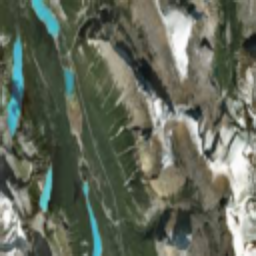

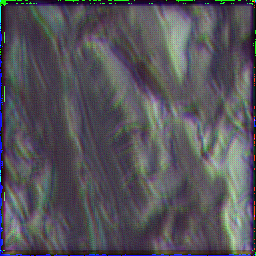

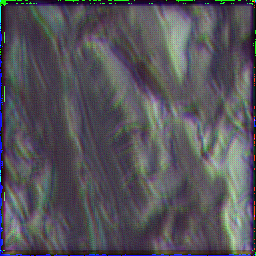

In [468]:
for image_batch, _ in train_loader_low:
  image_batch = image_batch.to(device)
  image_batch_recon = autoencoder(image_batch)
  #Show_imgs(image_batch[0].cpu(),"")
  #Show_imgs(image_batch_recon[0].cpu(),"")
  #image_batch[0].cpu() 
  im = transform.ToPILImage()(image_batch[0]).convert("RGB")  
  display(im)
  imt = transform.ToPILImage()(image_batch_recon[0]).convert("RGB")
  display(imt)
  #im = image_batch[0].permute(1,2,0)
  #im2 = image_batch_recon[0].permute(1, 2, 0)
  #plt.figure()
    
  #plt.imshow(im.cpu())
  #plt.figure()
  #plt.imshow(im2.cpu().detach().numpy())
# Open Image from dataset:
  my_img = image_batch_recon[0]
  results = transform.ToPILImage()(my_img)
  display(results)
  #plt.imshow(image_batch_recon[0].cpu().detach().numpy())  
  break

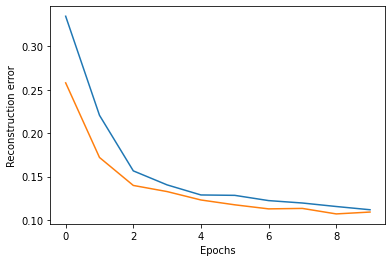

In [447]:
fig = plt.figure()
plt.plot(loss_result)
plt.plot(loss_val)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()